In [1]:
import pandas as pd
import numpy
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('data_clean.csv')
df['OCC_DATE'] = pd.to_datetime(df.OCC_DATE)
df = df[df.OCC_DATE.dt.year > 2016]     # Use 2017 to 2023 data
df

,EVENT_UNIQUE_ID,OCC_DATE,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
97891,GO-20174143,2017-01-01,17,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Hillcrest Village,-79.356093,43.811236
97892,GO-20174387,2017-01-01,18,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Air Gun Or Pistol: Bodily Harm,Assault,Newtonbrook East,-79.419816,43.797153
97893,GO-20174396,2017-01-01,18,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Moss Park,-79.362737,43.651562
97894,GO-20174595,2017-01-01,19,Ttc Subway Train,Transit,Assault,Assault,Downtown Yonge East,-79.382401,43.661368
97895,GO-20174802,2017-01-01,19,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Robbery - Mugging,Robbery,West Humber-Clairville,-79.604214,43.706023
...,...,...,...,...,...,...,...,...,...,...
355770,GO-20232281387,2023-09-30,17,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,Bay-Cloverhill,-79.385449,43.664737
355771,GO-20232283349,2023-09-30,22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Robbery - Vehicle Jacking,Robbery,West Rouge,-79.132110,43.779054
355772,GO-20232283383,2023-09-30,22,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Brookhaven-Amesbury,-79.496742,43.695252
355773,GO-20232279117,2023-09-30,12,"Apartment (Rooming House, Condo)",Apartment,Robbery With Weapon,Robbery,North Toronto,-79.396826,43.707053


## Exploratory Data Analysis (EDA)

In [3]:
df.isna().sum()     # Check for nulls

EVENT_UNIQUE_ID      0
OCC_DATE             0
OCC_HOUR             0
LOCATION_TYPE        0
PREMISES_TYPE        0
OFFENCE              0
MCI_CATEGORY         0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [4]:
df[df['EVENT_UNIQUE_ID'].duplicated(keep = False)].sort_values('EVENT_UNIQUE_ID')   #Find and drop duplicates
df.drop_duplicates('EVENT_UNIQUE_ID', inplace = True)

In [5]:
df.sort_values('NEIGHBOURHOOD_158', ascending= True)        #Longitude and Latitude are different even though the neighbourhood has the same name

,EVENT_UNIQUE_ID,OCC_DATE,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
250779,GO-2021568244,2021-03-28,11,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,Agincourt North,-79.277513,43.812226
352233,GO-20232077495,2023-09-05,20,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Agincourt North,-79.289079,43.811861
334785,GO-20231002587,2023-05-04,22,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft Of Motor Vehicle,Auto Theft,Agincourt North,-79.270293,43.801276
247263,GO-2021293535,2021-02-13,18,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,Agincourt North,-79.239712,43.811529
197943,GO-20191833351,2019-09-23,11,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,Agincourt North,-79.276091,43.812869
...,...,...,...,...,...,...,...,...,...,...
276701,GO-20212417800,2021-12-15,14,Other Commercial / Corporate Places (For Profi...,Commercial,Theft Of Motor Vehicle,Auto Theft,Yorkdale-Glen Park,-79.449470,43.727581
276654,GO-20212408112,2021-12-14,13,Schools During Supervised Activity,Educational,Assault,Assault,Yorkdale-Glen Park,-79.450505,43.720655
276649,GO-20212404655,2021-11-01,12,Homeless Shelter / Mission,Other,Assault,Assault,Yorkdale-Glen Park,-79.467625,43.715723
144570,GO-2018815246,2018-05-06,11,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,Yorkdale-Glen Park,-79.443078,43.707188


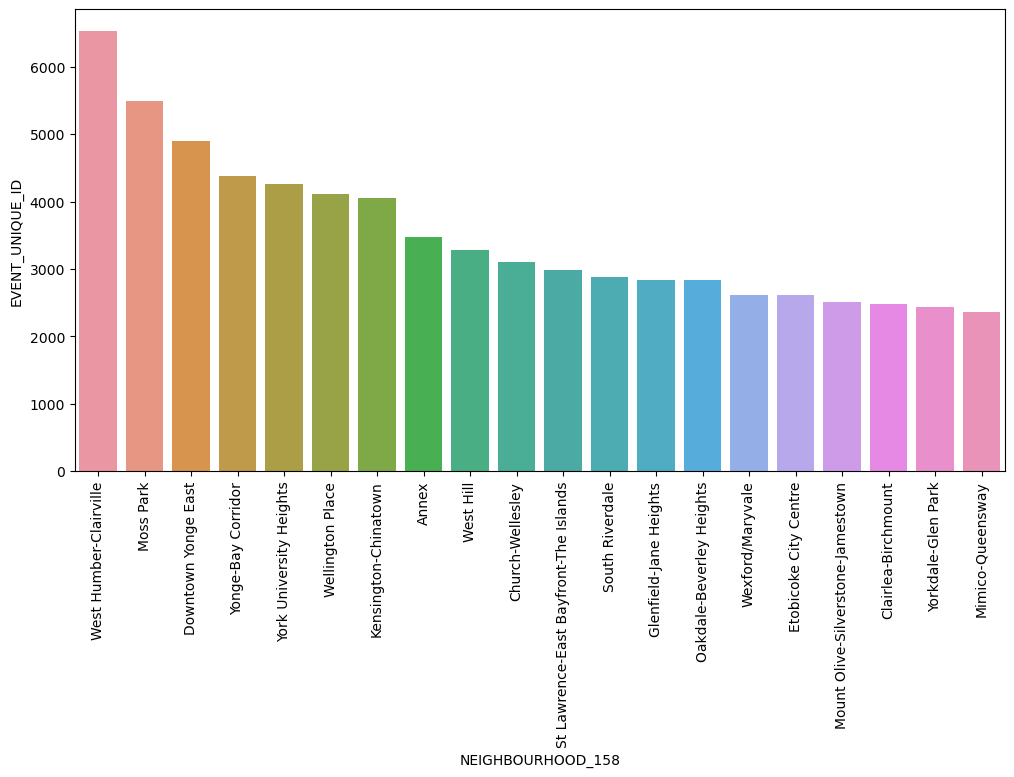

In [6]:
most_occ_n = df[['EVENT_UNIQUE_ID','NEIGHBOURHOOD_158']].groupby('NEIGHBOURHOOD_158', as_index= False).count().sort_values('EVENT_UNIQUE_ID', ascending= False) # Most occurred from 2014 to 2023

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.categorical.barplot(most_occ_n[:20], x = 'NEIGHBOURHOOD_158', y ='EVENT_UNIQUE_ID')
ax.tick_params(axis='x', labelrotation=90)
# print(most_occ_n.NEIGHBOURHOOD_158.iloc[:20])
plt.show()

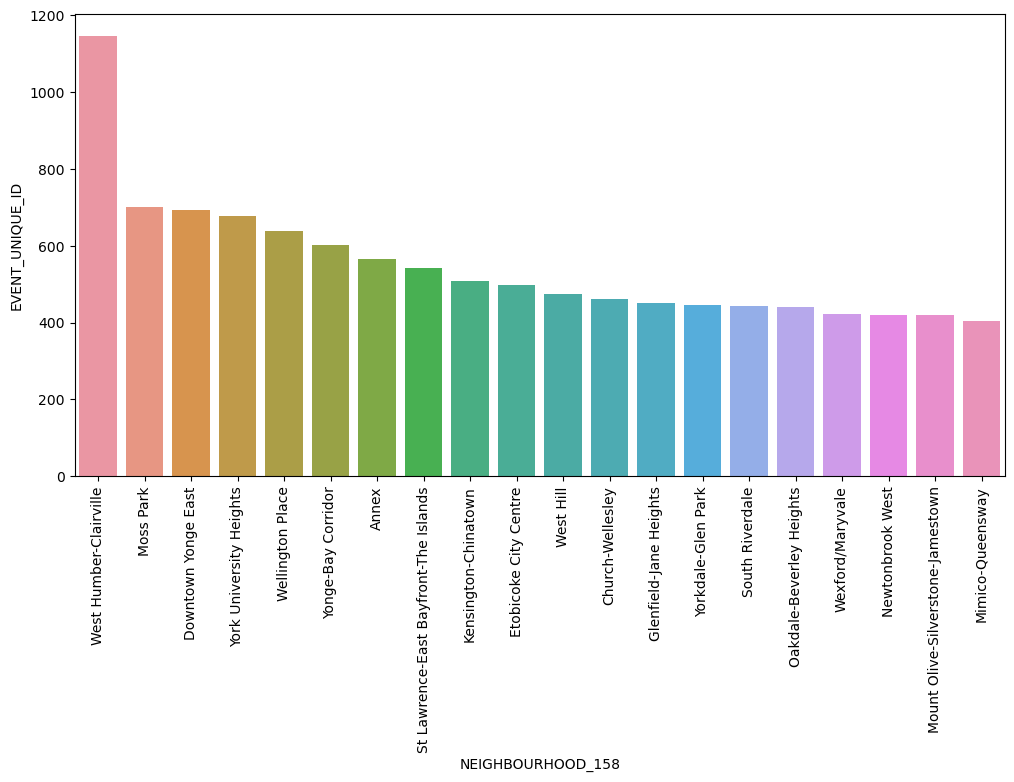

In [7]:
most_occ2022_n = df[df['OCC_DATE'].dt.year == 2022][['EVENT_UNIQUE_ID','NEIGHBOURHOOD_158']].groupby('NEIGHBOURHOOD_158', as_index= False).count().sort_values('EVENT_UNIQUE_ID', ascending= False) # Most occurred from 2014 to 2023

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.categorical.barplot(most_occ2022_n[:20], x = 'NEIGHBOURHOOD_158', y ='EVENT_UNIQUE_ID')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [8]:
print(df.nunique())
print(df['EVENT_UNIQUE_ID'].duplicated().sum())

EVENT_UNIQUE_ID      223407
OCC_DATE               2464
OCC_HOUR                 24
LOCATION_TYPE            54
PREMISES_TYPE             7
OFFENCE                  50
MCI_CATEGORY              5
NEIGHBOURHOOD_158       159
LONG_WGS84            22183
LAT_WGS84             22183
dtype: int64
0


EVENT_UNIQUE_ID                             1.000000
PREMISES_TYPE_Outside                       0.264448
NEIGHBOURHOOD_158_West Humber-Clairville    0.225335
PREMISES_TYPE_Apartment                     0.197394
NEIGHBOURHOOD_158_Moss Park                 0.179737
                                              ...   
NEIGHBOURHOOD_158_Woodbine-Lumsden         -0.045877
NEIGHBOURHOOD_158_Lambton Baby Point       -0.046625
PREMISES_TYPE_Other                        -0.178500
PREMISES_TYPE_Transit                      -0.244257
PREMISES_TYPE_Educational                  -0.265980
Name: EVENT_UNIQUE_ID, Length: 167, dtype: float64


<Axes: >

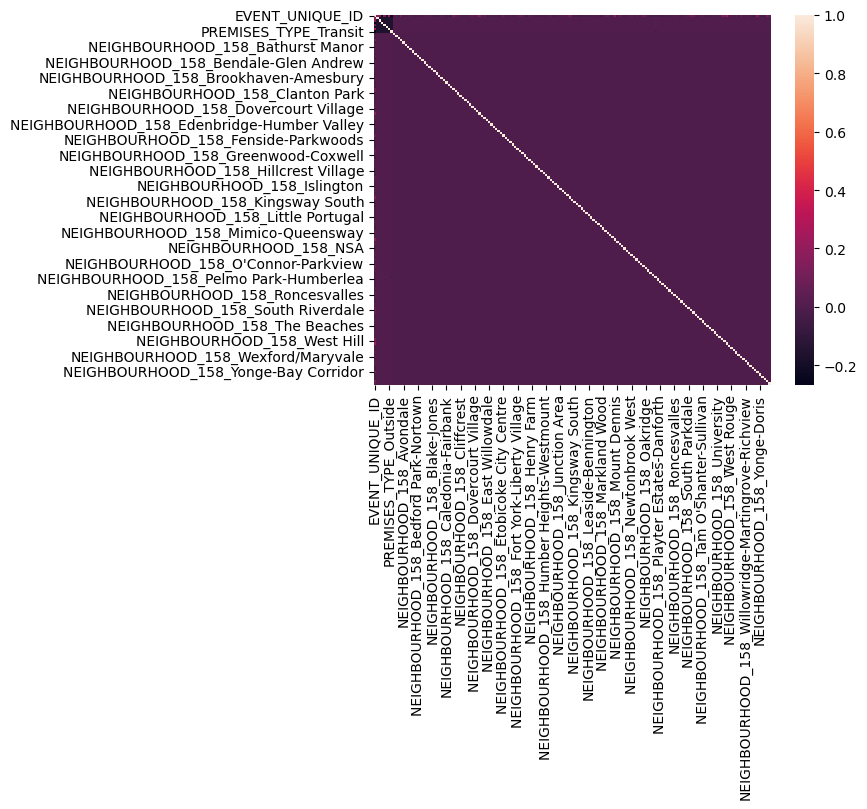

In [9]:
corr_data = df[['PREMISES_TYPE', 'NEIGHBOURHOOD_158', 'EVENT_UNIQUE_ID']].groupby(['PREMISES_TYPE', 'NEIGHBOURHOOD_158'], as_index = False).count()
corr_data = pd.get_dummies(corr_data).corr()
print(corr_data['EVENT_UNIQUE_ID'].sort_values(ascending = False))
sns.heatmap(corr_data)                                                      # No significant intercorrelation found 

In [13]:
temp =  df.OCC_DATE.astype(str) + ' ' + df.OCC_HOUR.astype(str) + ':00'
temp = pd.to_datetime(temp)

df['cleaned_date'] = temp
df.cleaned_date

# datetimeRange = pd.date_range(start=df.OCC_DATE.min(),end=df.OCC_DATE.max(), freq = 'H').to_frame(False, 'date')
# processed_data = datetimeRange.set_index('date').join(df.set_index('cleaned_date'))
# processed_data

97891    2017-01-01 17:00:00
97892    2017-01-01 18:00:00
97893    2017-01-01 18:00:00
97894    2017-01-01 19:00:00
97895    2017-01-01 19:00:00
                 ...        
355769   2023-09-30 08:00:00
355770   2023-09-30 17:00:00
355771   2023-09-30 22:00:00
355772   2023-09-30 22:00:00
355774   2023-09-30 20:00:00
Name: cleaned_date, Length: 223407, dtype: datetime64[ns]

In [65]:
df = df[df.OCC_DATE >= '2021-01-01']
df

,EVENT_UNIQUE_ID,OCC_DATE,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,cleaned_date
243546,GO-20212663,2021-01-01,13,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Harbourfront-CityPlace,-79.393925,43.642733,2021-01-01 13:00:00
243547,GO-20214579,2021-01-01,20,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,Lambton Baby Point,-79.502189,43.664279,2021-01-01 20:00:00
243548,GO-20213749,2021-01-01,16,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Mount Pleasant East,-79.378573,43.711782,2021-01-01 16:00:00
243549,GO-20213337,2021-01-01,13,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Harbourfront-CityPlace,-79.393925,43.642733,2021-01-01 13:00:00
243550,GO-20214611,2021-01-01,20,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Cabbagetown-South St.James Town,-79.371011,43.664814,2021-01-01 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...
355769,GO-20232275124,2023-09-30,8,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft Of Motor Vehicle,Auto Theft,Humber Summit,-79.556765,43.765449,2023-09-30 08:00:00
355770,GO-20232281387,2023-09-30,17,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,Bay-Cloverhill,-79.385449,43.664737,2023-09-30 17:00:00
355771,GO-20232283349,2023-09-30,22,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Robbery - Vehicle Jacking,Robbery,West Rouge,-79.132110,43.779054,2023-09-30 22:00:00
355772,GO-20232283383,2023-09-30,22,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Brookhaven-Amesbury,-79.496742,43.695252,2023-09-30 22:00:00


In [66]:
df.MCI_CATEGORY.unique()

array(['Assault', 'Break and Enter', 'Theft Over', 'Auto Theft',
       'Robbery'], dtype=object)

In [67]:
temp_df = df[['cleaned_date',  'MCI_CATEGORY', 'LAT_WGS84', 'LONG_WGS84']]
temp_df.set_index('cleaned_date')
temp_df

,cleaned_date,MCI_CATEGORY,LAT_WGS84,LONG_WGS84
243546,2021-01-01 13:00:00,Assault,43.642733,-79.393925
243547,2021-01-01 20:00:00,Assault,43.664279,-79.502189
243548,2021-01-01 16:00:00,Assault,43.711782,-79.378573
243549,2021-01-01 13:00:00,Assault,43.642733,-79.393925
243550,2021-01-01 20:00:00,Assault,43.664814,-79.371011
...,...,...,...,...
355769,2023-09-30 08:00:00,Auto Theft,43.765449,-79.556765
355770,2023-09-30 17:00:00,Assault,43.664737,-79.385449
355771,2023-09-30 22:00:00,Robbery,43.779054,-79.132110
355772,2023-09-30 22:00:00,Assault,43.695252,-79.496742


In [105]:
processed_data = pd.get_dummies(temp_df)
datetimeRange = pd.date_range(start=df.OCC_DATE.min(),end=df.OCC_DATE.max(), freq = 'H').to_frame(False, 'date')
processed_data = datetimeRange.set_index('date').join(processed_data.set_index('cleaned_date'), how = 'left')
# processed_data = processed_data.to_period('H')
processed_data.fillna(0, inplace = True)
# processed_data[processed_data.isna().any(axis=1)]
processed_data

,LAT_WGS84,LONG_WGS84,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over
2021-01-01,43.734450,-79.252643,1.0,0.0,0.0,0.0,0.0
2021-01-01,43.665480,-79.352620,0.0,0.0,1.0,0.0,0.0
2021-01-01,43.678796,-79.482903,1.0,0.0,0.0,0.0,0.0
2021-01-01,43.658666,-79.373246,1.0,0.0,0.0,0.0,0.0
2021-01-01,43.607501,-79.529886,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-30,43.724435,-79.535938,0.0,1.0,0.0,0.0,0.0
2023-09-30,43.609594,-79.531370,0.0,1.0,0.0,0.0,0.0
2023-09-30,43.735771,-79.259898,0.0,0.0,1.0,0.0,0.0
2023-09-30,43.744771,-79.486449,1.0,0.0,0.0,0.0,0.0


In [106]:
d = processed_data.reset_index(inplace= False)
d = d.groupby(['index', 'LAT_WGS84', 'LONG_WGS84'], as_index = False).sum()
d[d.MCI_CATEGORY_Assault > 1]

,index,LAT_WGS84,LONG_WGS84,MCI_CATEGORY_Assault,MCI_CATEGORY_Auto Theft,MCI_CATEGORY_Break and Enter,MCI_CATEGORY_Robbery,MCI_CATEGORY_Theft Over
55,2021-01-01 01:00:00,43.767264,-79.188074,2.0,0.0,0.0,0.0,0.0
127,2021-01-01 13:00:00,43.642733,-79.393925,2.0,0.0,0.0,0.0,0.0
1282,2021-01-17 14:00:00,43.666719,-79.446458,2.0,0.0,0.0,0.0,0.0
1425,2021-01-19 15:00:00,43.661046,-79.365011,2.0,0.0,0.0,0.0,0.0
1916,2021-01-26 20:00:00,43.653021,-79.572548,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95819,2023-09-24 00:00:00,43.659596,-79.381745,2.0,0.0,0.0,0.0,0.0
95846,2023-09-24 04:00:00,43.609797,-79.501053,2.0,0.0,0.0,0.0,0.0
95891,2023-09-24 16:00:00,43.743257,-79.582112,2.0,0.0,0.0,0.0,0.0
95935,2023-09-25 00:00:00,43.661366,-79.383107,2.0,0.0,0.0,0.0,0.0


In [70]:
d.columns

Index(['index', 'LAT_WGS84', 'LONG_WGS84', 'MCI_CATEGORY_Assault',
       'MCI_CATEGORY_Auto Theft', 'MCI_CATEGORY_Break and Enter',
       'MCI_CATEGORY_Robbery', 'MCI_CATEGORY_Theft Over'],
      dtype='object')

In [71]:
# lat_scaler = StandardScaler()
# lat_scaler.fit(d[['LAT_WGS84']])

# long_scaler = StandardScaler()
# long_scaler.fit(d[['LONG_WGS84']])

# d['LAT_WGS84'] = lat_scaler.transform(d[['LAT_WGS84']])
# d['LONG_WGS84'] = long_scaler.transform(d[['LONG_WGS84']])
# d

In [107]:
aggregated_data = d.groupby(['index', 'LAT_WGS84', 'LONG_WGS84'], as_index = False).sum()
aggregated_data = aggregated_data.set_index('index')
# aggregated_data['Crime_count'] = aggregated_data.iloc[:,2:].sum(axis = 1)
aggregated_data['Crime_count'] = aggregated_data.MCI_CATEGORY_Assault
aggregated_data[aggregated_data['Crime_count'] > 4]
aggregated_data = aggregated_data[['LAT_WGS84', 'LONG_WGS84', 'Crime_count']]
aggregated_data

,LAT_WGS84,LONG_WGS84,Crime_count
index,,,
2021-01-01,43.607501,-79.529886,1.0
2021-01-01,43.636249,-79.400876,1.0
2021-01-01,43.639647,-79.562933,1.0
2021-01-01,43.647802,-79.395966,1.0
2021-01-01,43.648743,-79.376427,1.0
...,...,...,...
2023-09-30,43.724435,-79.535938,0.0
2023-09-30,43.735771,-79.259898,0.0
2023-09-30,43.744771,-79.486449,1.0


## Model Fitting Test

                     LAT_WGS84  LONG_WGS84  Crime_count
date                                                   
2021-01-01 00:00:00        0.0         0.0          0.0
2021-01-01 01:00:00        0.0         0.0          0.0
2021-01-01 02:00:00        0.0         0.0          0.0
2021-01-01 03:00:00        0.0         0.0          0.0
2021-01-01 04:00:00        0.0         0.0          0.0
...                        ...         ...          ...
2023-09-29 20:00:00        0.0         0.0          0.0
2023-09-29 21:00:00        0.0         0.0          0.0
2023-09-29 22:00:00        0.0         0.0          0.0
2023-09-29 23:00:00        0.0         0.0          0.0
2023-09-30 00:00:00        0.0         0.0          0.0

[24049 rows x 3 columns]


<Axes: xlabel='date'>

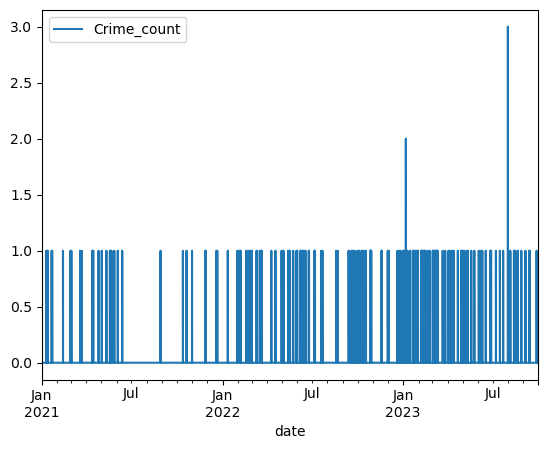

In [109]:
temp = aggregated_data[(aggregated_data.LAT_WGS84 == 43.6707982509655) & (aggregated_data.LONG_WGS84 == -79.3842059245105)].sort_index(ascending= True).join(datetimeRange.set_index('date'), how = 'right')
temp.fillna(0, inplace= True)
print(temp)
temp.plot(y = 'Crime_count')

In [141]:
temp[temp.Crime_count >= 1]

,LAT_WGS84,LONG_WGS84,Crime_count
date,,,
2021-01-09 20:00:00,43.670798,-79.384206,1.0
2021-01-12 21:00:00,43.670798,-79.384206,1.0
2021-01-20 19:00:00,43.670798,-79.384206,1.0
2021-01-21 20:00:00,43.670798,-79.384206,1.0
2021-02-12 17:00:00,43.670798,-79.384206,1.0
...,...,...,...
2023-08-27 14:00:00,43.670798,-79.384206,1.0
2023-09-05 01:00:00,43.670798,-79.384206,1.0
2023-09-12 16:00:00,43.670798,-79.384206,1.0


date
2023-09-12 16:00:00    1.0
2023-09-13 11:00:00    1.0
2023-09-27 11:00:00    1.0
Name: Crime_count, dtype: float64

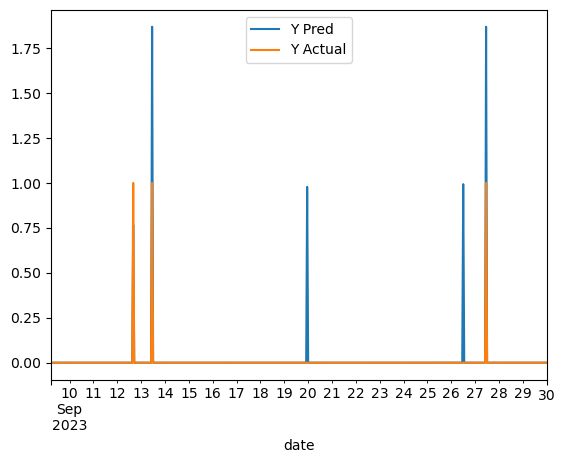

In [144]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier('D', 24)

dp = DeterministicProcess(
    temp.index,
    constant = True,
    order = 1,
    seasonal = True,
    additional_terms= [fourier]
)

X = dp.in_sample()

df = X.join(temp)
X_train, y_train, X_test, y_test = df.iloc[:-500, :-1], df.iloc[:-500, -1], df.iloc[-500:, :-1], df.iloc[-500:, -1]

model = LinearRegression().fit(X_train, y_train)
y_fit = pd.Series(model.predict(X_train), index = X_train.index)
y_resid = y_train - y_fit

boost = XGBRegressor().fit(X_train, y_resid)

y_pred_boosted = pd.Series(model.predict(X_test), index = X_test.index) + pd.Series(boost.predict(X_test), index = X_test.index)
ax = y_pred_boosted.plot(label = 'Y Pred')
ax = y_test.plot(ax = ax, label = 'Y Actual')
ax.legend()
ax.plot()
y_test[y_test>= 1]